# Support Vector Machine

# Problem Statement:

## Predict if a customer subscribes to a term deposits or not, when contacted by a marketing agent, by understanding the different features and performing predictiveanalytics

In [1]:
# import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing

from sklearn.model_selection import train_test_split

#model
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read data

df = pd.read_csv('bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Exploring data

df.shape

(41188, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Check for missing values

df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<AxesSubplot:>

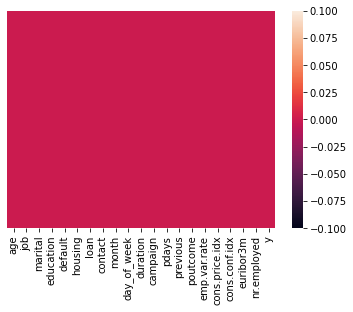

In [6]:
# Visualizing missing values

sns.heatmap(df.isna(), yticklabels = False)

In [7]:
# categorical Columns

num_cols = list(df.select_dtypes(exclude = 'O'))
print('Numerical Columns:',num_cols)

Numerical Columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [8]:
# Numerical Columns

cat_cols = list(df.select_dtypes(include = 'O'))
print('categorical Columns:',cat_cols)

categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [9]:
# printing categorical columns with unique values

for i in cat_cols:
    print(f'{i}:{df[i].unique()}')

job:['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital:['married' 'single' 'divorced' 'unknown']
education:['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default:['no' 'unknown' 'yes']
housing:['no' 'yes' 'unknown']
loan:['no' 'yes' 'unknown']
contact:['telephone' 'cellular']
month:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week:['mon' 'tue' 'wed' 'thu' 'fri']
poutcome:['nonexistent' 'failure' 'success']
y:['no' 'yes']


In [10]:
# Encoding categorical columns

df1 = pd.get_dummies(df[cat_cols], drop_first = True)

df = pd.concat([df,df1], axis = 1)
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,1,0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,1,0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,0,1,0,0,0,1,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,1,0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,0,1,0,0,0,1,0,0


In [11]:
df = df.drop(columns = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']], axis = 1)

In [12]:
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,1
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,1,0,0,0,0,0,0,1,0,1


### Support Vector Machine

In [13]:
# Define X and y

x = df.drop('y_yes', axis = 1)
y = df.y_yes

In [14]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 1)

In [15]:
support = svm.SVC()
support.fit(X_train, y_train)

SVC()

In [16]:
print(f'Train Score : {support.score(X_train, y_train)}')
print(f'Test Score : {support.score(X_test, y_test)}')

Train Score : 0.8988588671915646
Test Score : 0.8952820263818079


In [17]:
# from sklearn.model_selection import GridSearchCV
 
# param_grid = {'C': [1,2,3,4,5],
#               'gamma': [0.005,0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['rbf','linear','poly','sigmoid']}
 
# grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
# grid.fit(X_train, y_train)